<a href="https://colab.research.google.com/github/SaptarshiChakra/Regression/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROBLEM STATEMENT***

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


***IMPORT MODULE***

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***LOADING THE DATA***

In [404]:
#Reading the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/titanic/train (1).csv")
#Reading the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/titanic/test (1).csv")

***DATA INFORMATION***

In [405]:
df_train.shape

(891, 12)

In [406]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [407]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [408]:
df_test.shape

(418, 11)

In [409]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [411]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***EXPLORATORY DATA ANALYSIS***

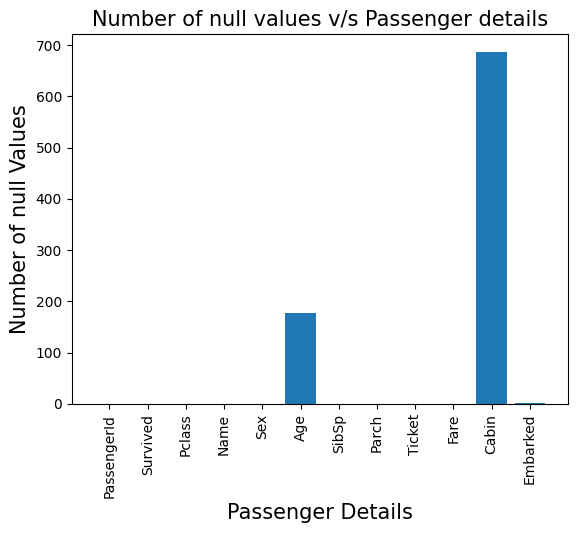

In [412]:
width=0.3
p = np.arange(len(df_train.columns))

plt.xlabel("Passenger Details" , fontsize=15)
plt.ylabel("Number of null Values" , fontsize=15)
plt.title("Number of null values v/s Passenger details" , fontsize=15)

plt.xticks(rotation=90)

plt.bar(df_train.columns , df_train.isna().sum())
plt.show()

<Axes: >

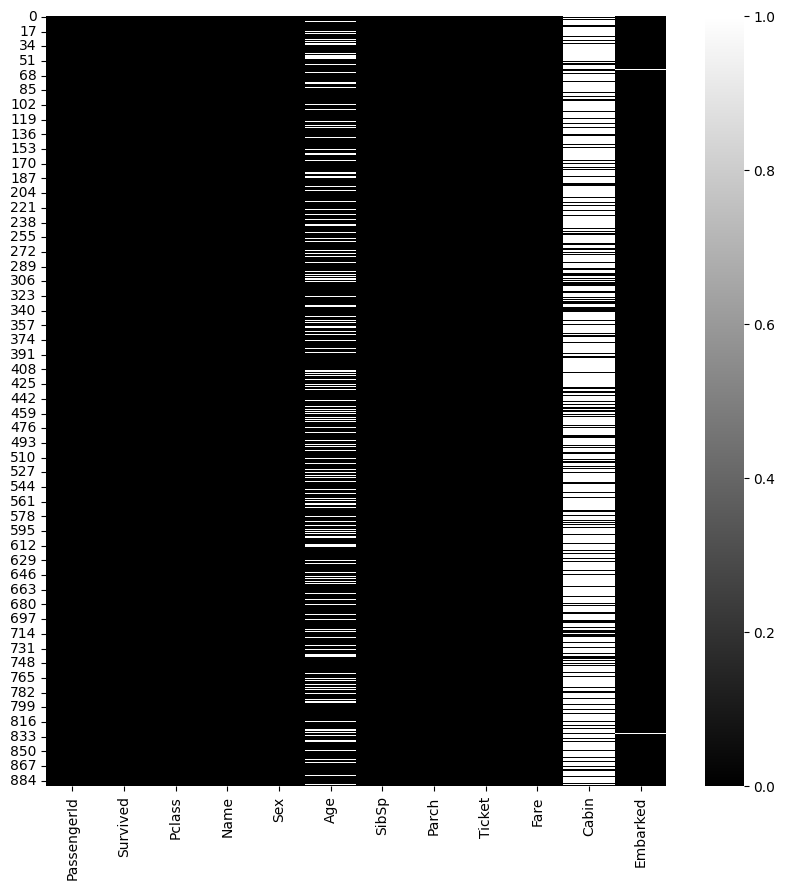

In [413]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isna(),cmap="binary_r")

<Axes: >

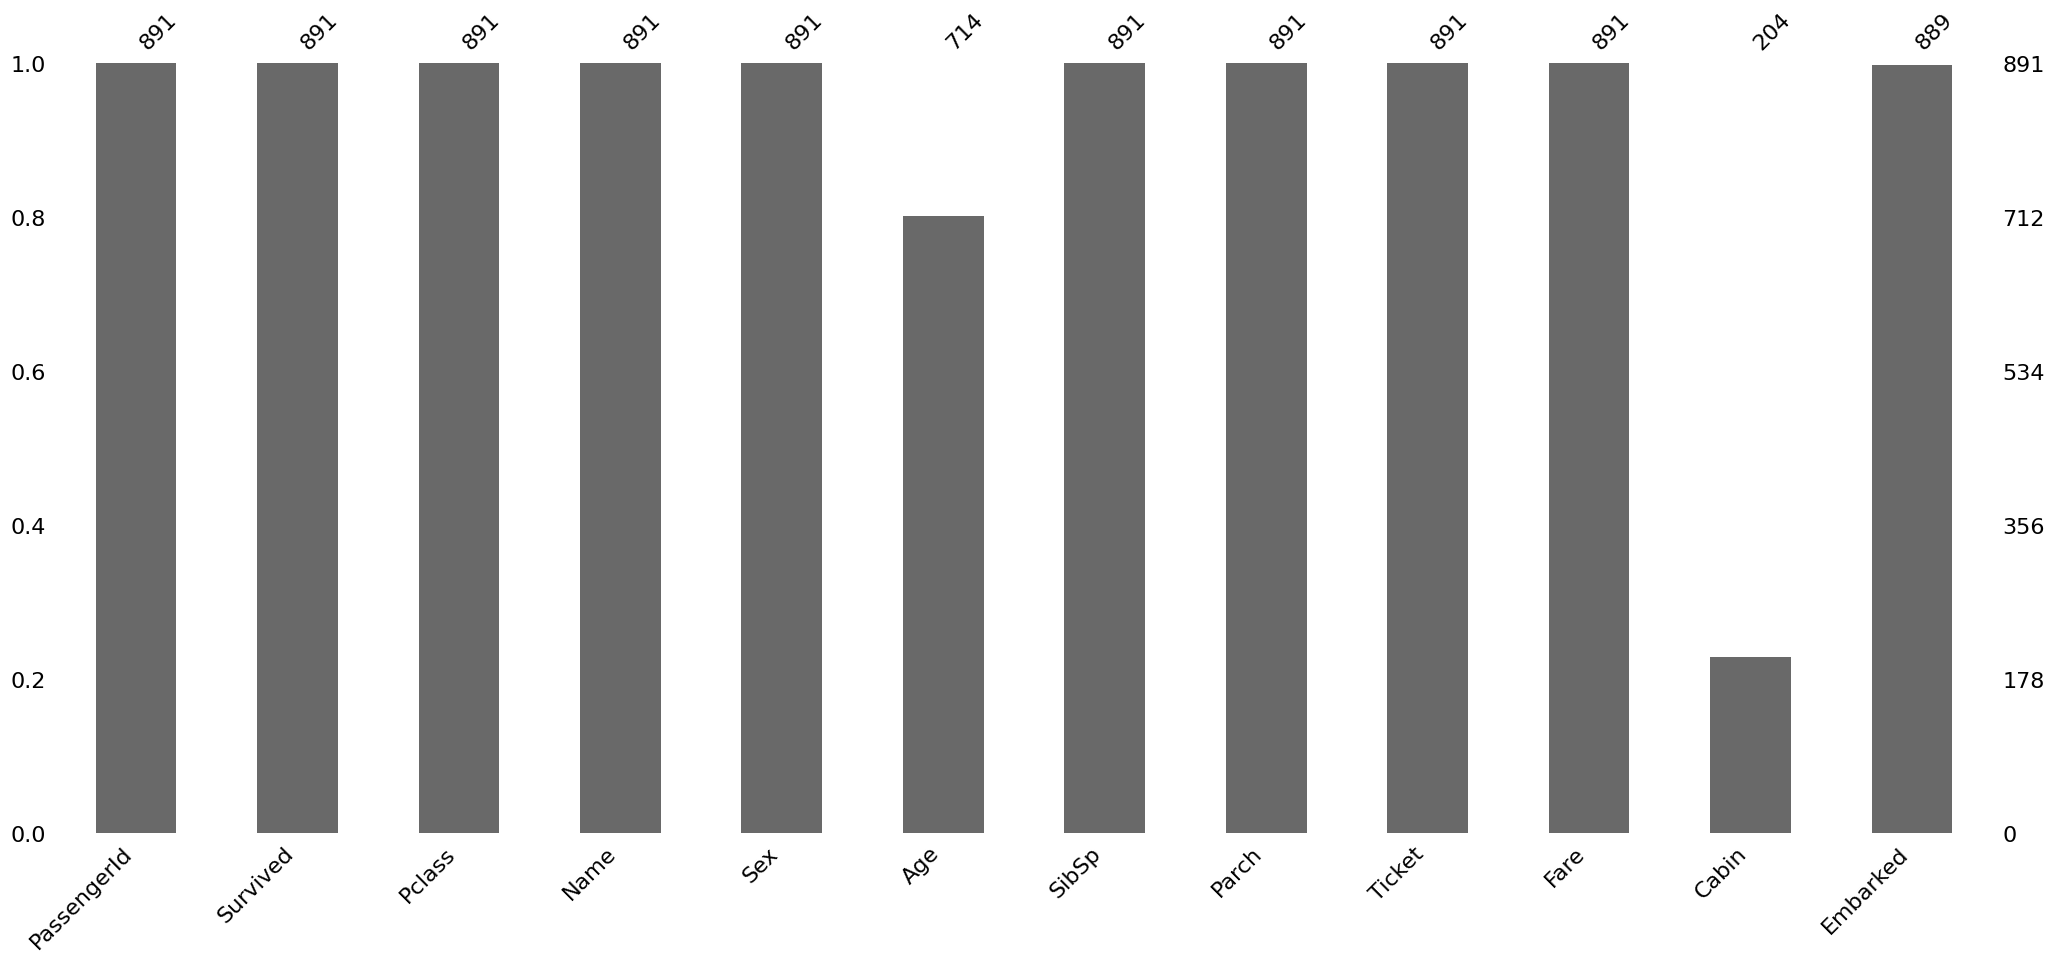

In [414]:
import missingno
missingno.bar(df_train)

<Axes: >

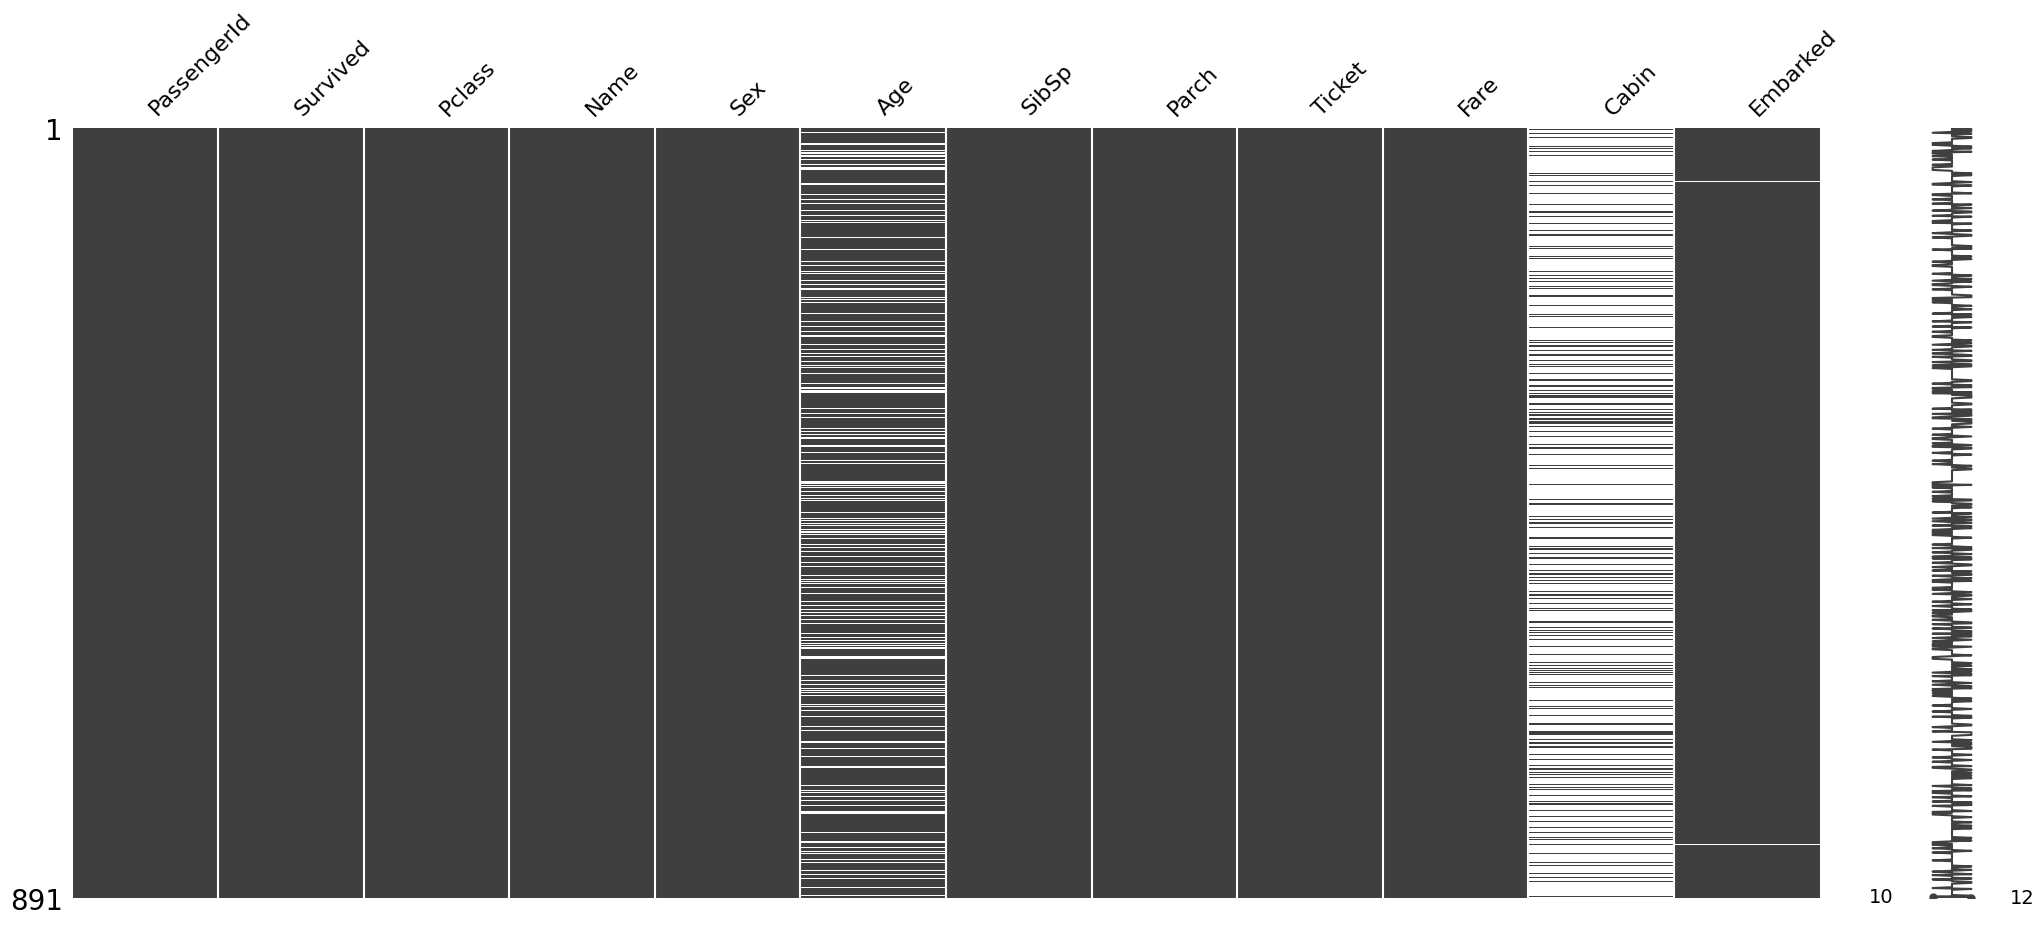

In [415]:
missingno.matrix(df_train)

<Axes: >

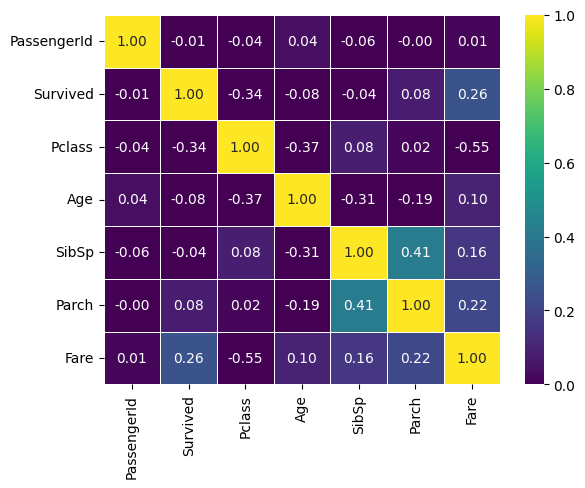

In [416]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap="viridis",linewidth=0.5,fmt='.2f',vmax=1,vmin=0)

In [417]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [418]:
df_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

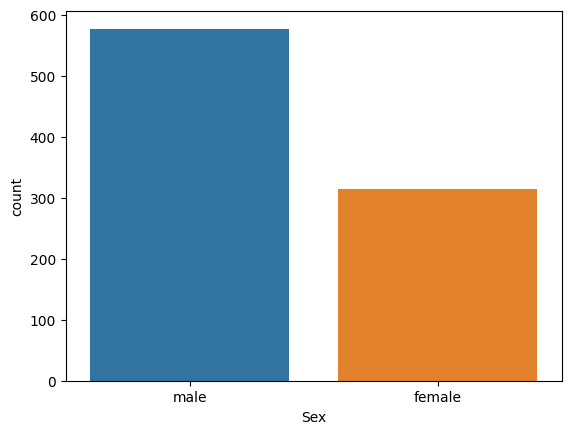

In [419]:
sns.countplot(x='Sex',data=df_train)

In [420]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

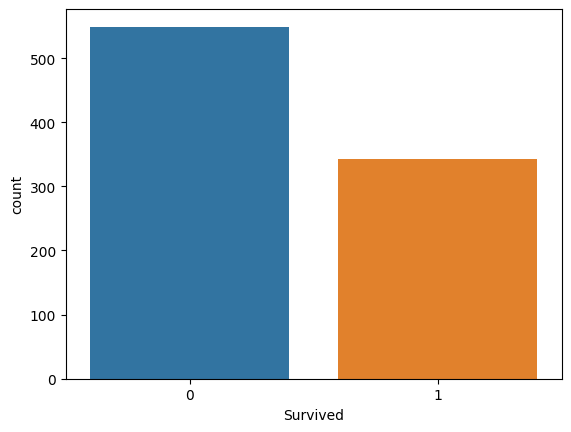

In [421]:
sns.countplot(x="Survived" , data=df_train)

In [422]:
df_train['Died'] = 1-df_train['Survived']
df_train.groupby('Sex').agg("sum")[['Survived','Died']]

<ipython-input-422-21b918ebb061>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Sex').agg("sum")[['Survived','Died']]


,Survived,Died
Sex,,
female,233,81
male,109,468


<ipython-input-423-59890988f0e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Sex').agg("sum")[['Survived','Died']].plot.bar()


<Axes: xlabel='Sex'>

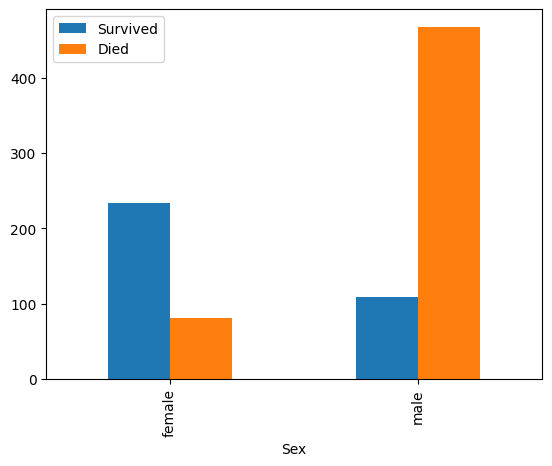

In [423]:
df_train.groupby('Sex').agg("sum")[['Survived','Died']].plot.bar()

In [424]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

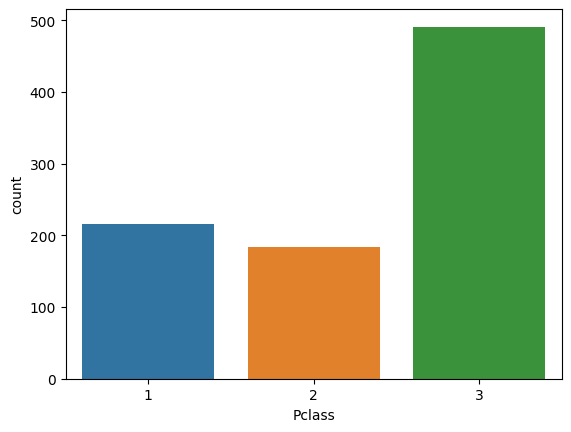

In [425]:
sns.countplot(x='Pclass', data=df_train)

<Axes: xlabel='Pclass', ylabel='count'>

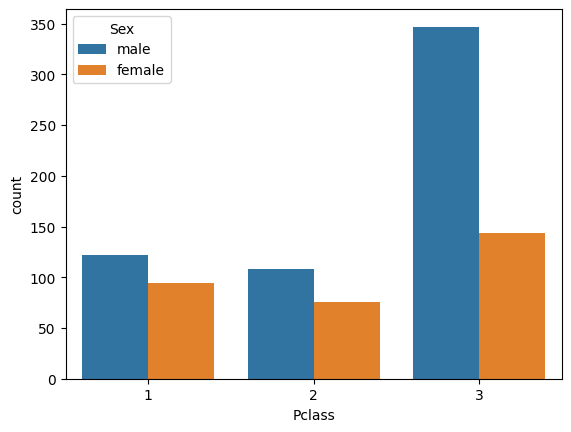

In [426]:
sns.countplot(x='Pclass', data=df_train, hue='Sex')

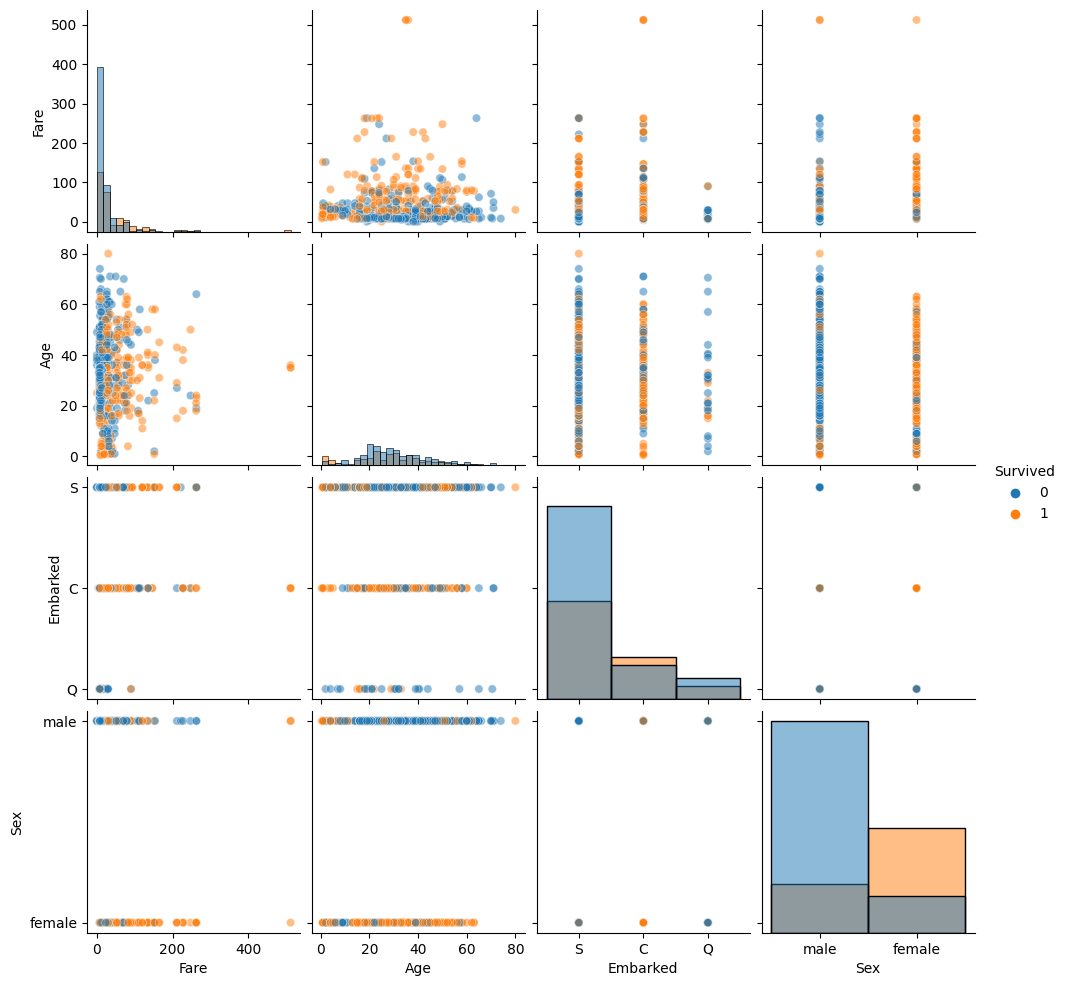

In [427]:
columns = ["Fare","Age","Embarked","Sex"]

sns.pairplot(
    data = df_train,
    vars = columns,
    hue = "Survived",
    diag_kind='hist',
    plot_kws={"alpha": 0.5},
    diag_kws={"bins": 30}
)

In [428]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

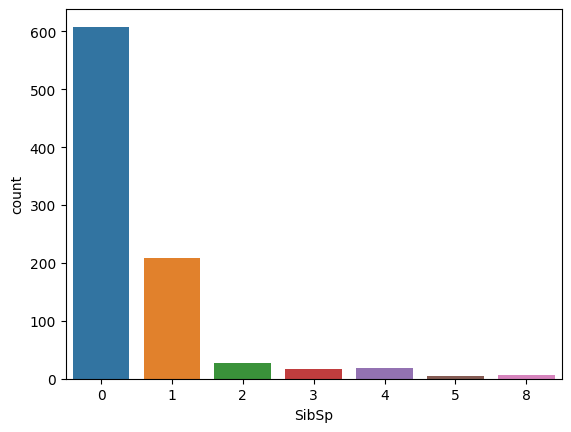

In [429]:
sns.countplot(x='SibSp',data=df_train)

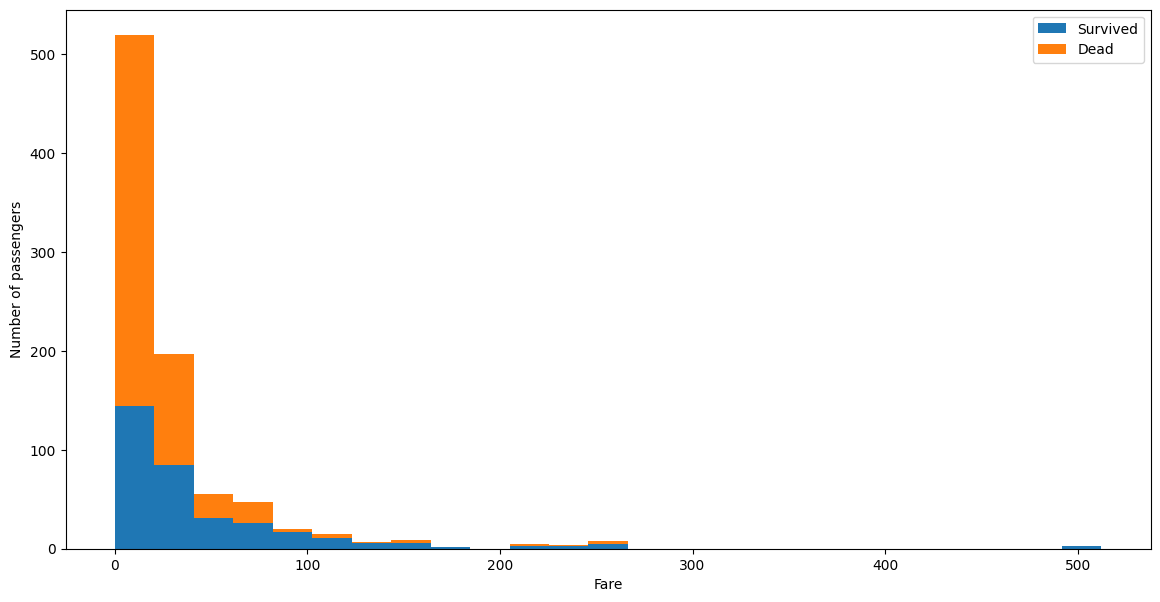

In [430]:
figure = plt.figure(figsize=(14, 7))
plt.hist([df_train[df_train['Survived'] == 1]['Fare'], df_train[df_train['Died'] == 1]['Fare']],
         stacked=True, bins = 25, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<Axes: xlabel='Sex', ylabel='Fare'>

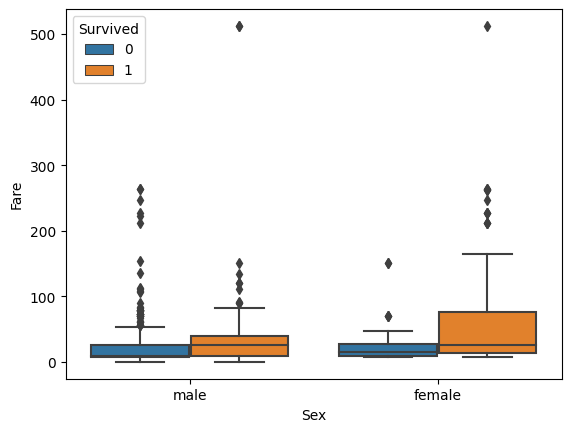

In [431]:
sns.boxplot(x='Sex',y='Fare',data=df_train,hue='Survived')

***DATA CLEANING***

In [432]:
df_train = df_train.drop(['Name','PassengerId','Ticket','Cabin','Died'],axis=1)
df_train , df_train.shape

(     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0           0       3    male  22.0      1      0   7.2500        S
 1           1       1  female  38.0      1      0  71.2833        C
 2           1       3  female  26.0      0      0   7.9250        S
 3           1       1  female  35.0      1      0  53.1000        S
 4           0       3    male  35.0      0      0   8.0500        S
 ..        ...     ...     ...   ...    ...    ...      ...      ...
 886         0       2    male  27.0      0      0  13.0000        S
 887         1       1  female  19.0      0      0  30.0000        S
 888         0       3  female   NaN      1      2  23.4500        S
 889         1       1    male  26.0      0      0  30.0000        C
 890         0       3    male  32.0      0      0   7.7500        Q
 
 [891 rows x 8 columns],
 (891, 8))

In [433]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0 , 'male' : 1})
df_train['Embarked'] = df_train['Embarked'].map({'S' : 0 , 'C' : 1 , 'Q' : 2})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [434]:
df=df_train.fillna(0)
df.isna().sum(),df.shape

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 (891, 8))

In [435]:
men_median_age = df[df['Sex']==1]['Age'].median()
women_median_age = df[df['Sex']==0]['Age'].median()

men_median_age , women_median_age

(25.0, 24.0)

In [436]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Sex']==1),'Age'] = men_median_age
df_train.loc[(df_train['Age'].isnull()) & (df_train['Sex']==0),'Age'] = women_median_age


In [437]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [453]:
df_train.dropna(inplace=True)
df_train.shape

(889, 8)

In [454]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0.0
1,1,1,0,0.472229,1,0,0.139136,1.0
2,1,3,0,0.321438,0,0,0.015469,0.0
3,1,1,0,0.434531,1,0,0.103644,0.0
4,0,3,1,0.434531,0,0,0.015713,0.0


In [455]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [456]:
X = df_train.loc[:, ['Age','Fare']]
y = df_train['Survived']

In [441]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [457]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

*MIN MAX SCALAR MODEL*

In [458]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.head()

,Age,Fare
708,0.271174,0.295806
240,0.296306,0.028213
382,0.396833,0.015469
792,0.296306,0.135753
683,0.170646,0.091543


In [459]:
scalar = MinMaxScaler().fit(X_train)
print(scalar)

MinMaxScaler()


In [460]:
scalar.data_max_ , scalar.data_min_

(array([1., 1.]), array([0., 0.]))

In [461]:
scalar.data_range_ , scalar.feature_range

(array([1., 1.]), (0, 1))

In [462]:
X_train.describe()

,Age,Fare
count,711.000000,711.000000
mean,0.356994,0.062578
std,0.167028,0.096023
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.308872,0.028302
75%,0.447097,0.059914
max,1.000000,1.000000


In [463]:
scalar.transform(X_train)

array([[0.27117366, 0.2958059 ],
       [0.2963056 , 0.02821272],
       [0.39683338, 0.01546857],
       ...,
       [0.59788892, 0.05061043],
       [0.25860769, 0.06709553],
       [0.40939935, 0.01689187]])

In [464]:
MinMaxScaler().fit_transform(X_test)

array([[0.39280035, 0.01533038],
       [0.19040046, 0.2342244 ],
       [0.19040046, 0.02194234],
       [0.42171462, 0.02537431],
       [0.248229  , 0.15546645],
       [0.37834321, 0.01361429],
       [0.34942894, 0.02537431],
       [0.2916004 , 0.01690807],
       [0.55182883, 0.21642979],
       [0.42171462, 0.20772777],
       [0.21931473, 0.05074862],
       [0.33497181, 0.03093714],
       [0.72531444, 0.01376888],
       [0.36388608, 0.02821272],
       [0.40725748, 0.01851017],
       [0.39280035, 0.04396587],
       [0.71085731, 0.20772777],
       [0.34942894, 0.01411046],
       [0.43617175, 0.07222739],
       [0.34942894, 0.01541158],
       [0.21931473, 0.0915427 ],
       [0.33497181, 0.10735285],
       [0.59520023, 0.01640391],
       [0.34942894, 0.0541074 ],
       [0.34942894, 0.01571255],
       [0.56628596, 0.0541074 ],
       [0.50845742, 0.02513033],
       [0.33497181, 0.02410559],
       [0.34942894, 0.08275929],
       [0.36388608, 0.02049464],
       [0.

In [465]:
df_train['Age'] = (df_train['Age']-min(df_train['Age']))/(max(df_train['Age'])-min(df_train['Age']))
df_train['Fare'] = (df_train['Fare']-min(df_train['Fare']))/(max(df_train['Fare'])-min(df_train['Fare']))

df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.354841,0.524184,0.382452,0.062649,0.362205
std,0.486260,0.834700,0.477538,0.164858,1.103705,0.806761,0.097003,0.636157
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000
50%,0.000000,3.000000,1.000000,0.308872,0.000000,0.000000,0.028213,0.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000


***REGRESSOR MODEL***

In [482]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Survived'],axis=1),df_train['Survived'],random_state=10,test_size=0.17,stratify=df_train.Survived)

In [486]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

model = LogisticRegression()
model.fit(X_train,y_train)
con = confusion_matrix(y_test,Y_pred)

Y_pred = model.predict(X_test)
accuracy_score(y_test,Y_pred) , con

(0.8223684210526315,
 array([[80, 14],
        [13, 45]]))

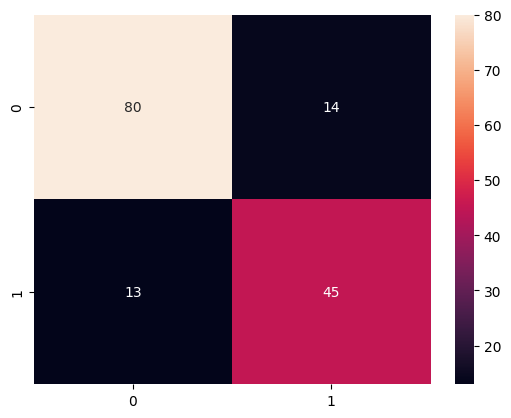

In [487]:
sns.heatmap(con,annot=True)
plt.show()

In [488]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [489]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae = np.mean(np.abs(y_train - y_train_pred))
    model_test_mae = np.mean(np.abs(y_test - y_test_pred))

    model_train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    model_test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    model_train_r2 = model.score(X_train, y_train)
    model_test_r2 = model.score(X_test, y_test)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3792
- Mean Absolute Error: 0.2951
- R2 Score: 0.3912
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3764
- Mean Absolute Error: 0.2881
- R2 Score: 0.3997


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4860
- Mean Absolute Error: 0.4724
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4858
- Mean Absolute Error: 0.4722
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3792
- Mean Absolute Error: 0.2954
- R2 Score: 0.3911
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3761
- Mean Absolute Error: 0.2878
- R2 Score: 0.4007


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3260
- Mean Absolute Error: 0.2182
- R2 Score: 0.5501
----------------------

In [490]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('=' * 35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.7910
- F1 score: 0.7903
- Precision: 0.7353
- Recall: 0.7092
- Roc Auc Score: 0.7755
----------------------------------
Model performance for Test set
- Accuracy: 0.8224
- F1 score: 0.8227
- Precision: 0.7627
- Recall: 0.7759
- Roc Auc Score: 0.8135


Decision Tree
Model performance for Training set
- Accuracy: 0.9796
- F1 score: 0.9796
- Precision: 0.9926
- Recall: 0.9539
- Roc Auc Score: 0.9748
----------------------------------
Model performance for Test set
- Accuracy: 0.8092
- F1 score: 0.8074
- Precision: 0.7736
- Recall: 0.7069
- Roc Auc Score: 0.7896


Random Forest
Model performance for Training set
- Accuracy: 0.9796
- F1 score: 0.9796
- Precision: 0.9785
- Recall: 0.9681
- Roc Auc Score: 0.9774
----------------------------------
Model performance for Test set
- Accuracy: 0.8158
- F1 score: 0.8151
- Precision: 0.7679
- Recall: 0.7414
- Roc Auc Score: 0.8015




In [492]:
from sklearn.ensemble import RandomForestClassifier

# Extract features from training data
y = df_train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])

# Extract features from test data and ensure it has the same columns as X
X_test = pd.get_dummies(df_test[features])
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Make predictions on the test data
predictions = model.predict(X_test)

# Create a DataFrame for submission
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/MyDrive/titanic/gender_submission (1).csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
